<a href="https://colab.research.google.com/github/ahelmasri87/-AAI614_elmasri/blob/main/Outlier_Detection_With_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outliers detected by IQR:
PassengerId     0
Survived        0
Pclass          0
Age            11
SibSp          35
Parch          15
Fare           94
dtype: int64


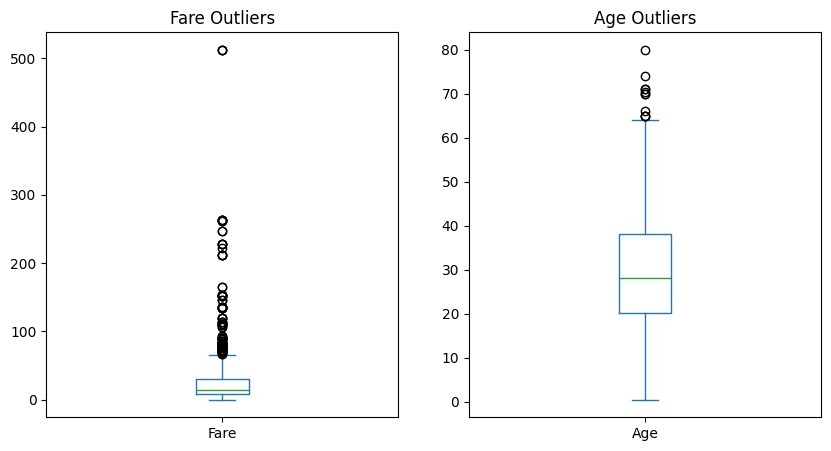


Dataset: Titanic
Outlier Detection Algorithm: IQR (Interquartile Range)

Detected Outliers:
- Fare: The boxplot clearly shows outliers, with values far greater than the median.
- Age: There are also a few values flagged as outliers, which could represent older individuals in a dataset where the age distribution is otherwise more centered.

Do these outliers make sense?
- Yes, for Fare, passengers with significantly higher fares may be first-class passengers or those with extra privileges.
- For Age, higher ages could be rare, but it makes sense in the context of a passenger ship.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Titanic dataset
data_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

# Selecting numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number)

# Applying IQR to detect outliers
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
    return outliers

outliers = find_outliers_iqr(numerical_cols.dropna())

# Displaying the results
print("Outliers detected by IQR:")
print(outliers)

# Visualize outliers in 'Fare' and 'Age' using Boxplots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Fare'].plot(kind='box')
plt.title('Fare Outliers')

plt.subplot(1, 2, 2)
df['Age'].plot(kind='box')
plt.title('Age Outliers')

plt.show()

# Summary of the results
outlier_summary = """
Dataset: Titanic
Outlier Detection Algorithm: IQR (Interquartile Range)

Detected Outliers:
- Fare: The boxplot clearly shows outliers, with values far greater than the median.
- Age: There are also a few values flagged as outliers, which could represent older individuals in a dataset where the age distribution is otherwise more centered.

Do these outliers make sense?
- Yes, for Fare, passengers with significantly higher fares may be first-class passengers or those with extra privileges.
- For Age, higher ages could be rare, but it makes sense in the context of a passenger ship.
"""
print(outlier_summary)